# Case Study - Bike Sharing system 

### Problem Statement: 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Aim

The company wants to understand the factors affecting the demand, particulary:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

#### The steps we will follow:
* Reading, understanding and visualizing the data
* Preparing the data for modelling
* Training the model
* Residual analysis
* Prediction and evaluation on test set

### Step 1:Reading, understanding and visualizing the data


In [564]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [565]:
#lets analyze the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [566]:
bike.shape

(730, 16)

In [567]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [568]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Checking for null Columns/Rows

In [569]:
missing_col = bike.isnull().sum()
missing_col

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [570]:
missing_row =bike.isnull().sum(axis=1).sort_values(ascending=False)
missing_row

0      0
479    0
481    0
482    0
483    0
      ..
245    0
246    0
247    0
248    0
729    0
Length: 730, dtype: int64

No null Columns or Rows

##### Checking for Duplicates

In [571]:
bike.duplicated(subset=None, keep='first').count()

730

No duplicates

Looking at the dictionary, the below do not serve much purpose, hence we shall remove these variables:

* instant- records index values, all are unique.
* dteday- records date, we already have 'year' & 'month' categories, hence removing this.
* casual- contains the count casual users.
* registered- contains the count registered users.
    * We have the total counts cnt,which is our target variable, hence removing the above two.

In [572]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [573]:
bike_new=bike.drop(['instant','dteday','casual','registered'],axis=1)
bike_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [574]:
bike_new.shape

(730, 12)

In [575]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Lets visualize the dataset

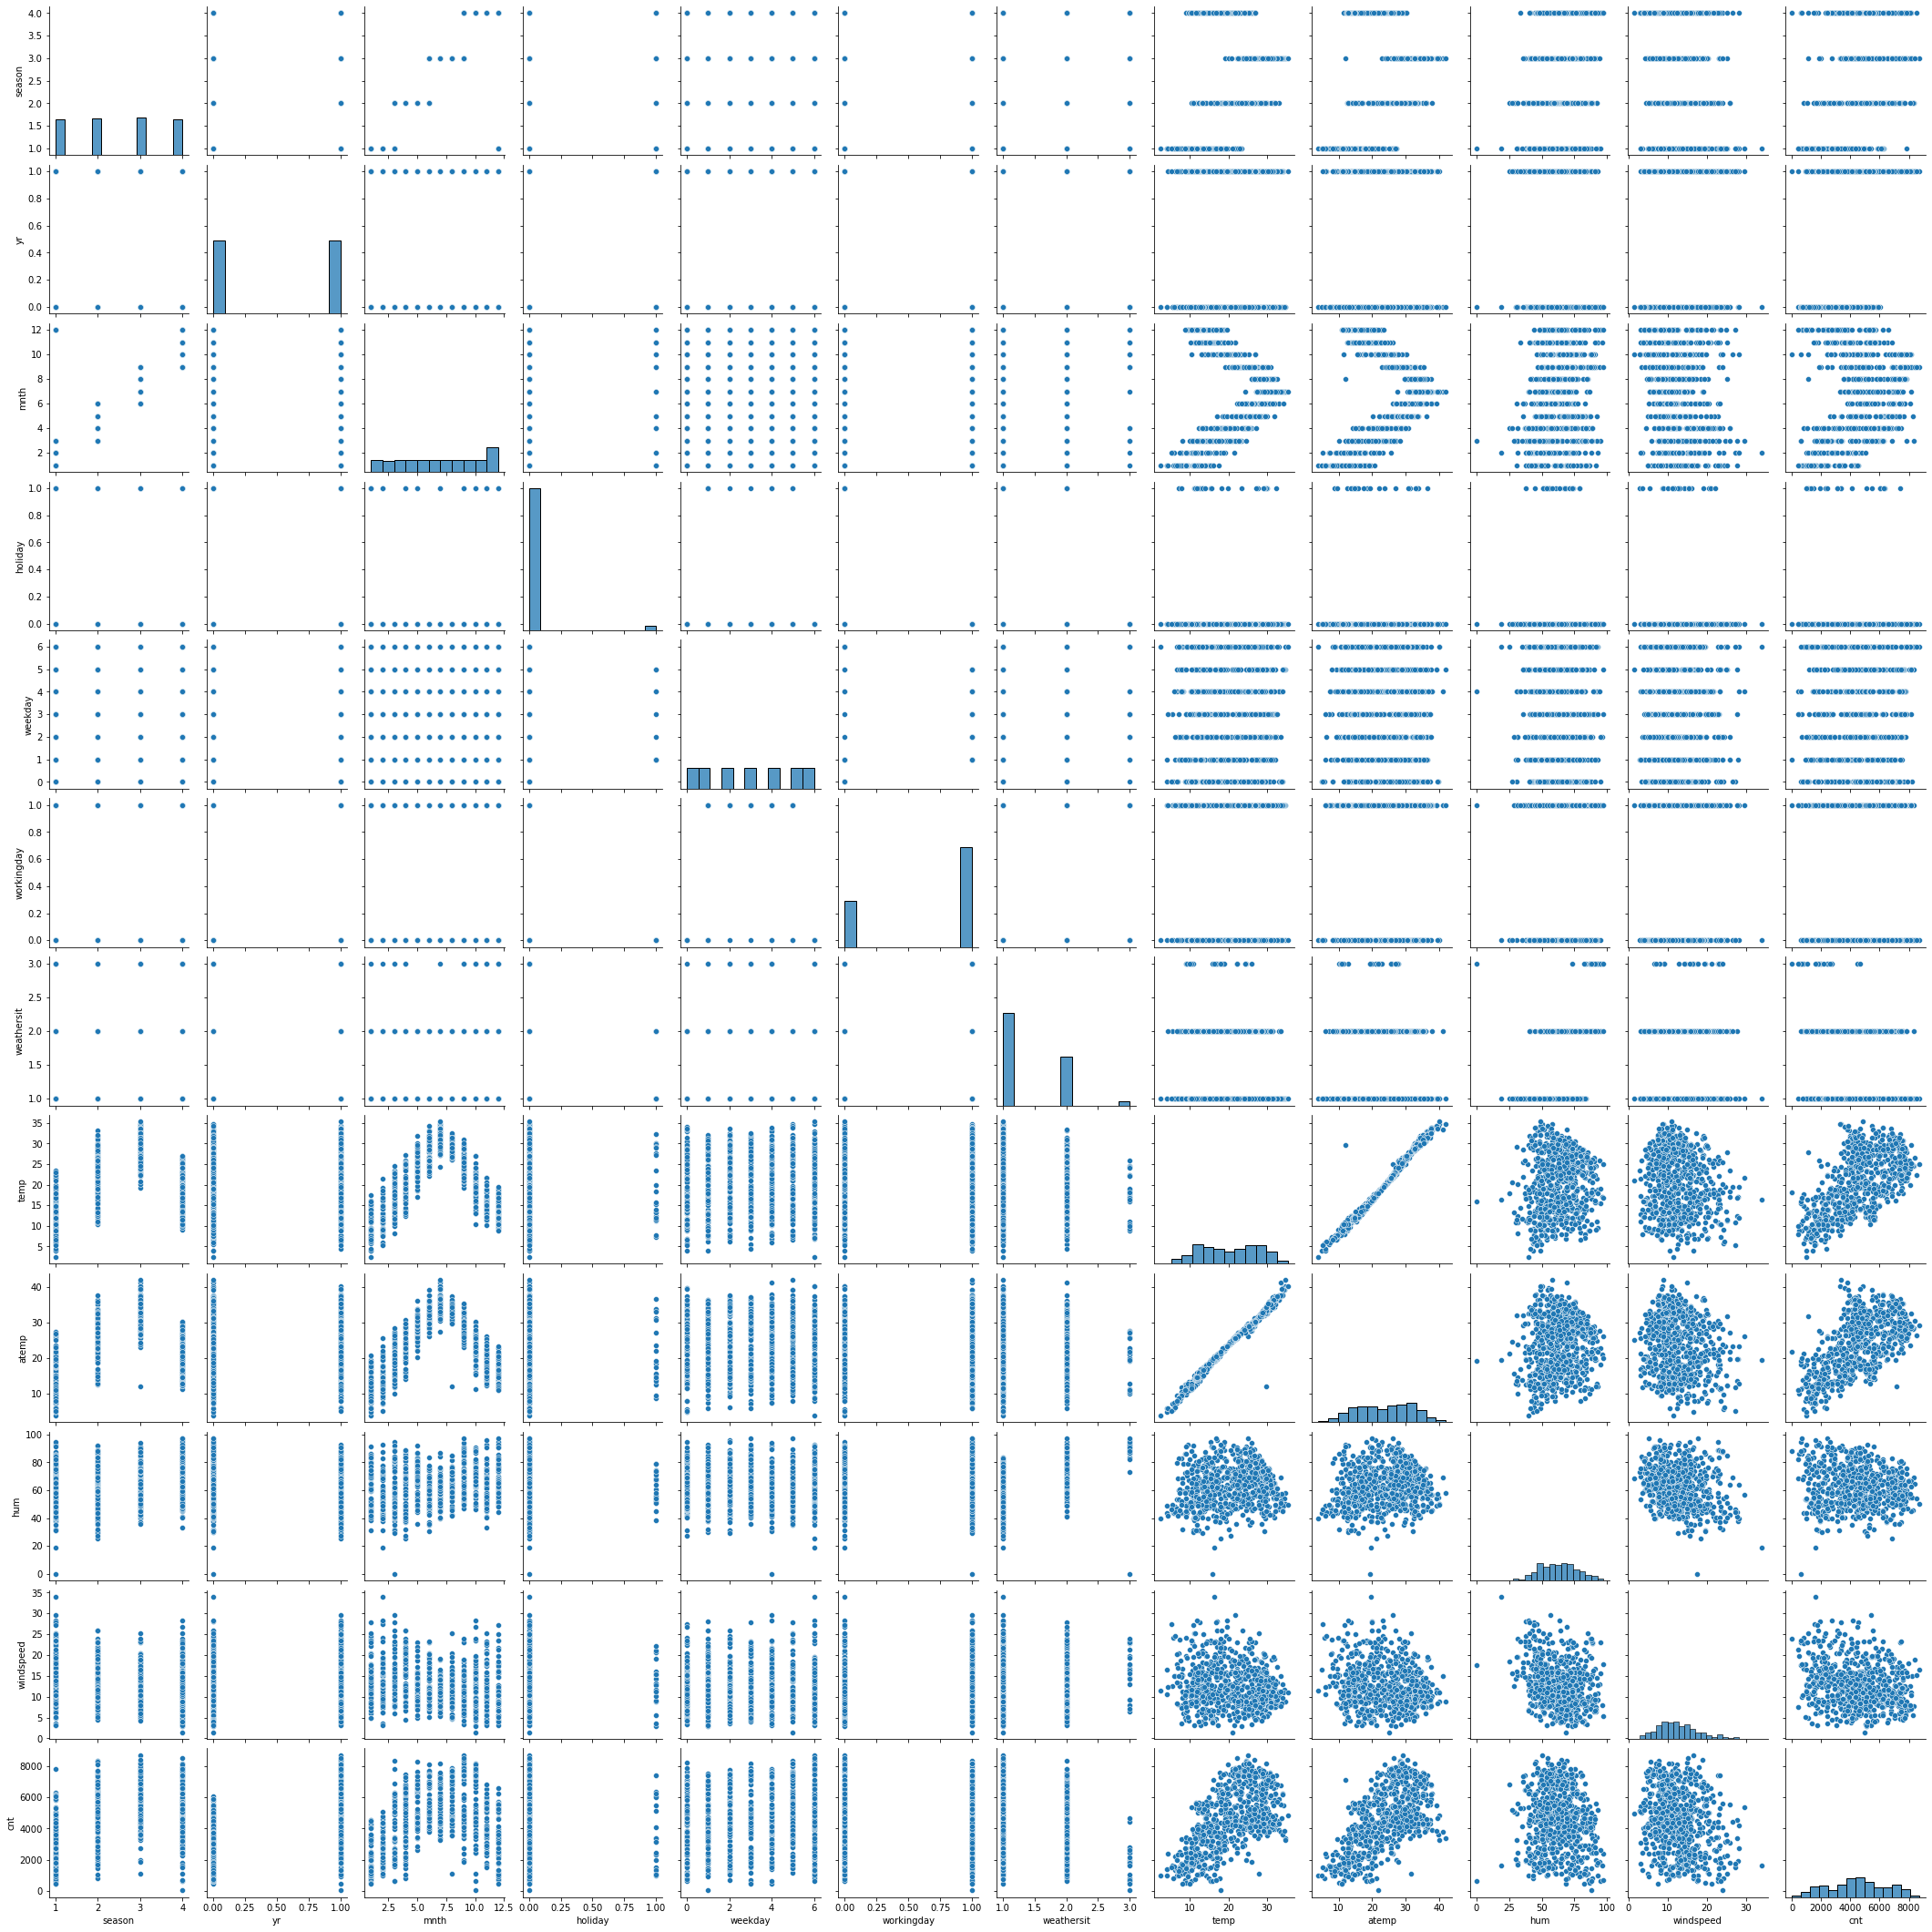

In [576]:
sns.pairplot(bike_new)
plt.show()

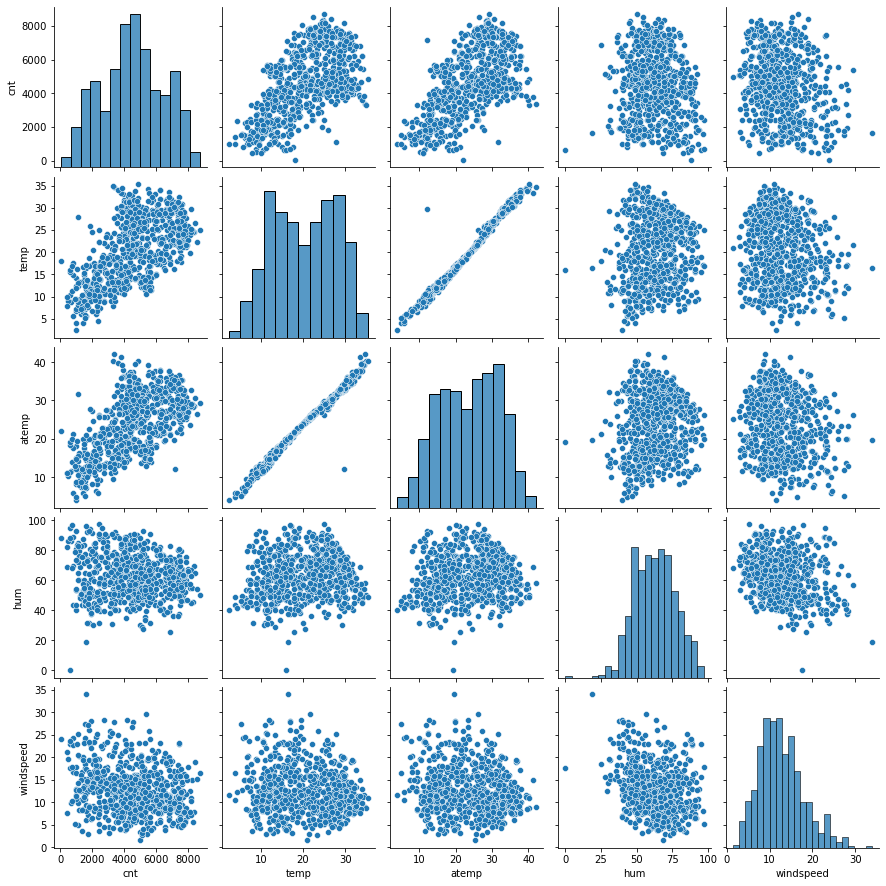

In [577]:
# Numeric variables:
sns.pairplot(data=bike_new,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

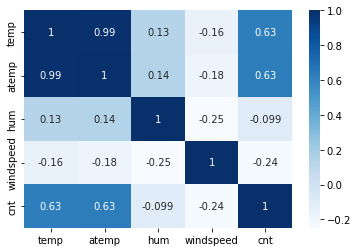

In [578]:
sns.heatmap(bike_new[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='Blues', annot = True)
plt.show()

* Observation:
1. Temp and Atemp are positively correlated with cnt.
2. They have the highest corelation with the target variable cnt.
3. Temp and Atemp are highly co-related with each other, hence we can remove one of them.
4. Hum and Windspeed values are more scattered around.
5. And they are negatively correlated with the target,cnt decreases with increase in hum/windspeed.

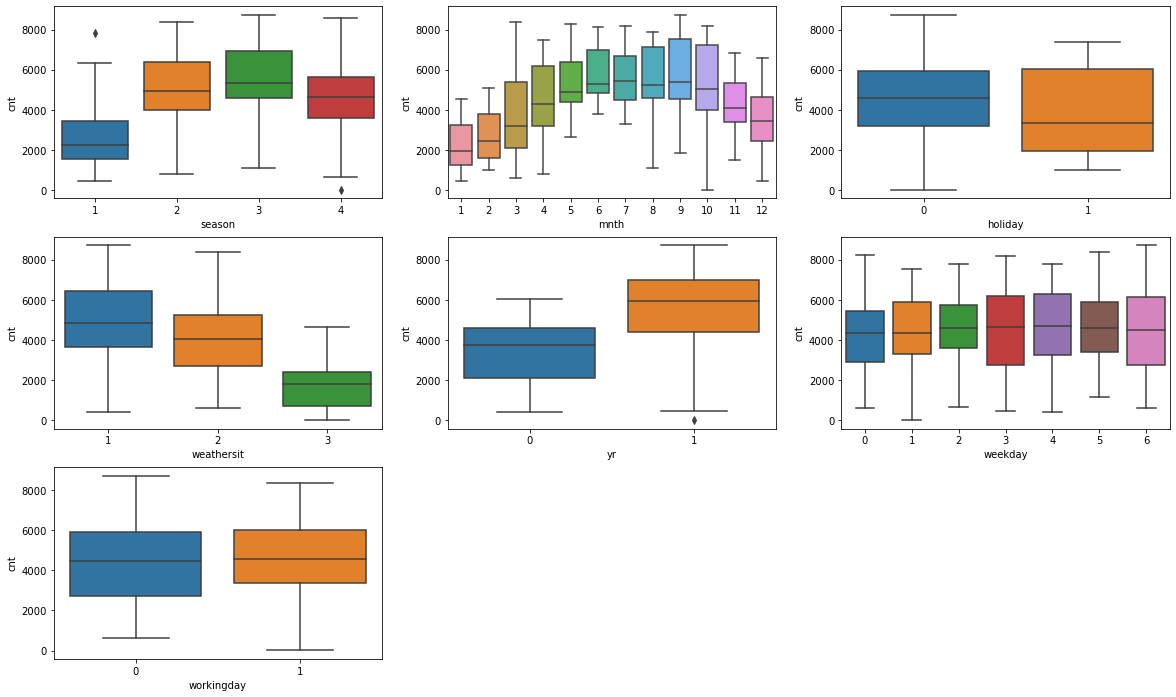

In [579]:
# Categorical variables: 
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()


* Observation:
1. The demand is least for spring season.
2. The number of bike shares gradually increase until September and then starts to decrease.
3. The cnt values are less during holidays.
4. We do not find any values for weathersit - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
5. However, there is high number of bike sharing during Clear, Few clouds, Partly cloudy, Partly cloudy weathersit.
6. The cnt values have increased in 2019 compared to 2018.
7. Weekday doesnt give many details on the demand trend.

### Step2: Preparing the data for modelling 

#### Encoding 
    * -Converting binary categorical variables to 1/0
    * -Converting other categorical variables to dummy variables

Lets create dummy variables for the categorical variables: season ,weathersit, mnth and weekday. Convert them to values mentioned in the data dictionary.
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* mnth : month ( 1 to 12)
* weekday : day of the week

In [580]:
bike_new.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [581]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [582]:
#season:
bike_new['season'] = bike_new['season'].map({1: 'spring',2:'summer',3:'fall',4:'winter'}) 
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [583]:
bike_new.shape

(730, 12)

In [584]:
#weathersit
bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [585]:
bike_new['weathersit'] = bike_new['weathersit'].map({1:'Clear',2:'Mist',3:'Snow'})
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [586]:
#mnth
bike_new.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [587]:
bike_new['mnth'] = bike_new['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [588]:
#weekday
bike_new.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [589]:
bike_new['weekday'] = bike_new['weekday'].map({0: 'tue',1: 'wed',2: 'thur',3: 'fri',4: 'sat',5: 'sun',6: 'mon'})
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [590]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [591]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [592]:
# Create dummies for the above categories 
# Drop original variable for which the dummy was created

dummy = bike_new[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

In [593]:
bike_new = pd.concat([bike_new,dummy],axis = 1)

In [594]:
bike_new.shape

(730, 34)

In [595]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
0,spring,0,jan,0,mon,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,jan,0,tue,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [596]:
bike_new.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [597]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [598]:
bike_new.shape

(730, 30)

In [599]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint8  
 9   season_summer    730 non-null    uint8  
 10  season_winter    730 non-null    uint8  
 11  mnth_aug         730 non-null    uint8  
 12  mnth_dec         730 non-null    uint8  
 13  mnth_feb         730 non-null    uint8  
 14  mnth_jan         730 non-null    uint8  
 15  mnth_jul         730 non-null    uint8  
 16  mnth_jun         730 non-null    uint8  
 17  mnth_mar        

#### Splitting into train-test and Rescaling the variables

In [600]:
#splitting into train-test
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [601]:
df_train, df_test =train_test_split(bike_new, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [602]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,1,0


In [603]:
scaler = MinMaxScaler()

# create a list of only numeric variables(non-binary),apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt','hum','windspeed','temp','atemp']

In [604]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,1,0


In [605]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


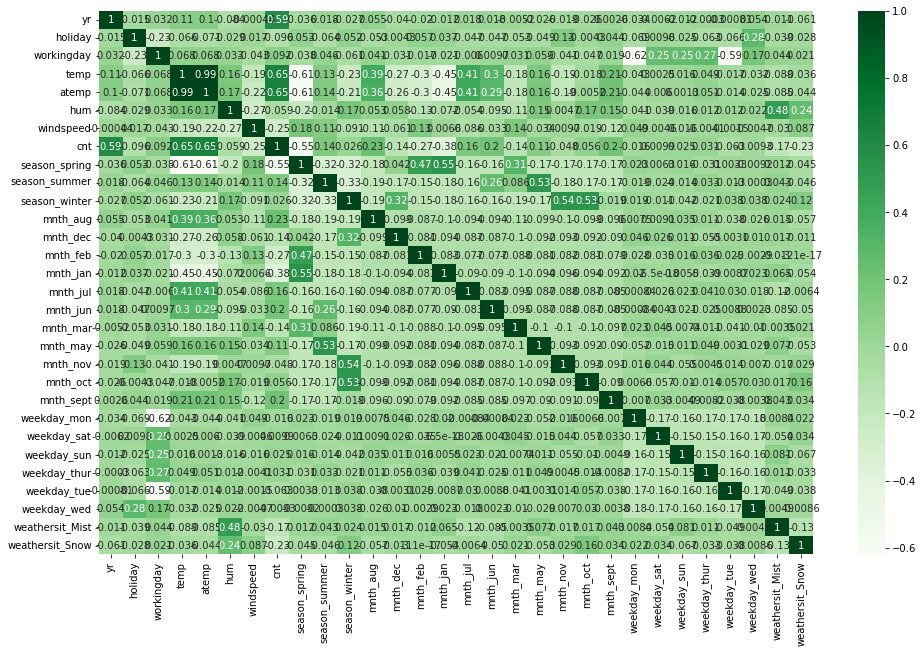

In [606]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()
# We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Step3: Training the model

In [607]:
#Building a linear model:

In [608]:
# lets create X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [609]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In statsmodels, we need to explicitly fit a constant using sm.add_constant(X).

In [610]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Variable Selection using RFE

In [611]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [612]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # We are considering 20 variables
rfe = rfe.fit(X_train, y_train)

In [613]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 10),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 9),
 ('weekday_sun', False, 6),
 ('weekday_thur', False, 5),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 4),
 ('weathersit_Mist', True, 1),
 ('weathersit_Snow', True, 1)]

In [614]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_mon', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

In [615]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_jun', 'mnth_mar', 'mnth_oct', 'weekday_sat',
       'weekday_sun', 'weekday_thur', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [616]:
# Creating X_test dataframe with RFE selected variables
# Model 1
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sept,weekday_mon,weathersit_Mist,weathersit_Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,1,0,0,0,0,0,0,1,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,1,0,0,0,0,0,0,0,0,0,1,0


In [617]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [618]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          6.28e-188
Time:                        16:13:11   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2973      0.039     

In [619]:
lm.params

const              0.297274
yr                 0.231818
holiday           -0.048972
workingday         0.044097
temp               0.426748
atemp              0.027348
hum               -0.154194
windspeed         -0.186236
season_spring     -0.055933
season_summer      0.028832
season_winter      0.099386
mnth_dec          -0.048800
mnth_feb          -0.034738
mnth_jan          -0.064934
mnth_jul          -0.051296
mnth_may           0.022996
mnth_nov          -0.046115
mnth_sept          0.072084
weekday_mon        0.054453
weathersit_Mist   -0.058267
weathersit_Snow   -0.254531
dtype: float64

In [620]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [621]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.29
4,temp,59.59
5,atemp,53.94
8,season_spring,5.90
10,season_winter,4.02
9,season_summer,3.62
13,mnth_jan,2.38
6,hum,1.97
3,workingday,1.88
12,mnth_feb,1.87


In [622]:
# Model 2
# Removing 'atemp' as it has a high P value and high VIF
X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [623]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.18
7,season_spring,5.79
4,temp,4.88
9,season_winter,3.88
8,season_summer,3.49
12,mnth_jan,2.38
5,hum,1.97
3,workingday,1.88
11,mnth_feb,1.87
15,mnth_nov,1.82


In [624]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.20e-189
Time:                        16:13:12   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2970      0.038     

In [625]:
# Model 3
# Removing 'mnth_may' as it has a high P value
X_train_new = X_train_rfe.drop(['mnth_may'], axis=1)

In [626]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,93.26
7,season_spring,5.69
4,temp,4.73
9,season_winter,3.85
8,season_summer,2.82
12,mnth_jan,2.37
5,hum,1.94
3,workingday,1.88
11,mnth_feb,1.86
14,mnth_nov,1.81


In [627]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          9.80e-190
Time:                        16:13:12   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2868      0.038     

In [628]:
# Model 4
# Removing 'mnth_feb' as it has a high P value
X_train_new = X_train_rfe.drop(['mnth_feb'], axis=1)

In [629]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.88
7,season_spring,5.27
4,temp,4.43
9,season_winter,3.83
8,season_summer,2.77
5,hum,1.94
3,workingday,1.88
15,weekday_mon,1.79
13,mnth_nov,1.77
11,mnth_jan,1.68


In [630]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.52e-190
Time:                        16:13:12   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2756      0.037     

In [631]:
# Model 5
# Removing 'holiday' as it has a high P value
X_train_new = X_train_rfe.drop(['holiday'], axis=1)

In [632]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.13
6,season_spring,5.26
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.77
4,hum,1.94
12,mnth_nov,1.75
10,mnth_jan,1.68
2,workingday,1.66
14,weekday_mon,1.65


In [633]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.20e-190
Time:                        16:13:12   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2690      0.037     

In [634]:
# Model 6
# P values are now below 0.05
# Removing 'season_spring' as it has a high VIF value
X_train_new = X_train_rfe.drop(['season_spring'], axis=1)

In [635]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.71
3,temp,2.33
7,season_winter,2.09
4,hum,1.91
11,mnth_nov,1.69
9,mnth_jan,1.67
2,workingday,1.66
13,weekday_mon,1.65
14,weathersit_Mist,1.56
8,mnth_dec,1.48


In [636]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          6.82e-190
Time:                        16:13:12   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2037      0.030     

In [637]:
# Model 7
# Removing 'mnth_nov' due to high P value
X_train_new = X_train_rfe.drop(['mnth_nov'], axis=1)

In [638]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.61
3,temp,2.26
4,hum,1.91
2,workingday,1.66
12,weekday_mon,1.65
9,mnth_jan,1.63
13,weathersit_Mist,1.56
7,season_winter,1.55
6,season_summer,1.43
10,mnth_jul,1.43


In [639]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.76e-190
Time:                        16:13:12   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1959      0.030     

In [640]:
# Model 8
# Removing 'mnth_dec' due to high P value
X_train_new = X_train_rfe.drop(['mnth_dec'], axis=1)

In [641]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.65
3,temp,2.07
4,hum,1.89
2,workingday,1.65
11,weekday_mon,1.64
12,weathersit_Mist,1.56
8,mnth_jan,1.55
7,season_winter,1.53
9,mnth_jul,1.43
6,season_summer,1.41


In [642]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          4.53e-191
Time:                        16:13:12   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1907      0.030     

In [643]:
# Model 9
# Removing 'mnth_jan' as it has a non-zero p value and from the above visualization we noticed that it doesnt have a huge demand
X_train_new = X_train_rfe.drop(['mnth_jan'], axis=1)

In [644]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,weekday_mon,1.64
3,temp,1.60
11,weathersit_Mist,1.56
8,mnth_jul,1.43
6,season_summer,1.33
7,season_winter,1.29
12,weathersit_Snow,1.24


In [645]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          4.14e-191
Time:                        16:13:13   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1712      0.028     

In [646]:
# Model 10
# Removing 'mnth_jul' as it has a non-zero p value and from the above visualization we noticed that it doesnt have a huge demand
X_train_new = X_train_rfe.drop(['mnth_jul'], axis=1)

In [647]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
9,weekday_mon,1.64
10,weathersit_Mist,1.56
3,temp,1.27
7,season_winter,1.25
11,weathersit_Snow,1.24
6,season_summer,1.19
5,windspeed,1.18


In [648]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.10e-191
Time:                        16:13:13   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1705      0.029     

In [649]:
# Model 11
# Removing 'const' as it has high VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [650]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,weathersit_Mist,2.10
0,yr,2.02
8,weekday_mon,1.79
6,season_winter,1.66
5,season_summer,1.58
7,mnth_sept,1.20


In [651]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.10e-191
Time:                        16:13:13   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1705      0.029     

In [652]:
# Model 12
# Removing 'hum' as it has high VIF
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [653]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.86
2,workingday,1.65
8,weekday_mon,1.63
6,season_winter,1.21
3,temp,1.20
5,season_summer,1.19
7,mnth_sept,1.10
4,windspeed,1.09
10,weathersit_Snow,1.05
9,weathersit_Mist,1.04


In [654]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.13e-188
Time:                        16:13:13   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

* We can conclude this to be our final model as the P values are zero and VIFs are optimal.
* The F-Statistics value of 253.0 (which is greater than 1) and the p-value of 0 implying that the overall model is significant.

### Step4: Residual Analysis

In [655]:
y_train_cnt = lm.predict(X_train_rfe)

##### Error terms are following a normal distribution: 

Text(0.5, 0, 'Errors')

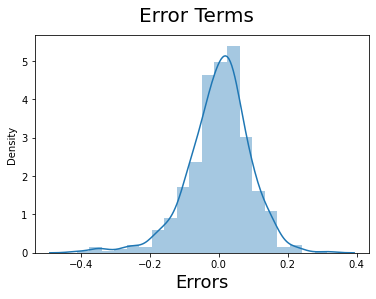

In [656]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### VIF values are less than 5 which is good.

In [657]:
# Multi-collinearity check:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.86
2,workingday,1.65
8,weekday_mon,1.63
6,season_winter,1.21
3,temp,1.20
5,season_summer,1.19
7,mnth_sept,1.10
4,windspeed,1.09
10,weathersit_Snow,1.05
9,weathersit_Mist,1.04


##### Homoscedacity test: No visible pattern observed from above plot for residuals.

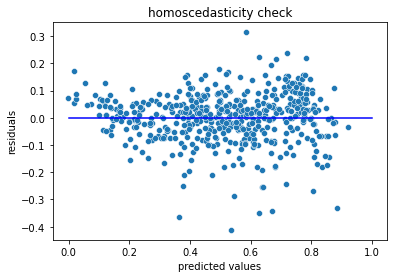

In [658]:
y_train_cnt = lm.predict(X_train_rfe)
res = y_train -y_train_cnt

p = sns.scatterplot(y_train_cnt,res)
plt.xlabel('predicted values')
plt.ylabel('residuals')
p = plt.plot([0,1],[0,0],color='blue')
p = plt.title('homoscedasticity check')

##### Independence of errors can be checked using Durbin-Watson:
* Durbin-Watson value of final model is 2.089, which signifies there is no autocorrelation.

### Step5: Prediction and evaluation on test set

In [659]:
# lets perform scaling on the test data.
num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [660]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [661]:
df_test.shape

(220, 30)

In [662]:
y_test = df_test.pop('cnt')
X_test = df_test

In [663]:
X_test = sm.add_constant(X_test)

In [664]:
X_test_new = X_test[X_train_rfe.columns]
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   windspeed        220 non-null    float64
 5   season_summer    220 non-null    uint8  
 6   season_winter    220 non-null    uint8  
 7   mnth_sept        220 non-null    uint8  
 8   weekday_mon      220 non-null    uint8  
 9   weathersit_Mist  220 non-null    uint8  
 10  weathersit_Snow  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [665]:
y_pred = lm.predict(X_test_new)

In [666]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test, y_pred)
r2

0.7961390438459766

In [667]:
# Calculating Adjusted-R^2 value for the test dataset
adjust_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
adjust_r2

0.7854

Text(0, 0.5, 'y_pred')

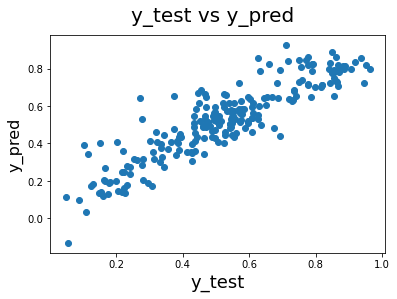

In [668]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


In [669]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.13e-188
Time:                        16:13:15   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019      4.031      0.000       0.038       0.112
yr                  0.2331      0.008     28.370      0.000       0.217       0.249
workingday          0.0561      0.011      5.024      0.000       0.034       0.078
temp                0.5499      0.020     27.861      0.000       0.511       0.589
windspeed          -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer       0.0886      0.010      8.608      0.000       0.068       0.109
season_winter       0.1307      0.010     12.600      0.000       0.110       0.151
mnth_sept           0.0974      0.016      6.184      0.000       0.066       0.128
weekday_mon         0.0675      0.014      4.693      0.000       0.039       0.096
weathersit_Mist    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
weathersit_Snow    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Equation
We can see that the equation of our best fitted line is:
* cnt = 0.0750 + (temp × 0.5499) + (yr × 0.2331) + (season_winter x 0.1307) + (mnth_sept x 0.0974) + (season_summer x 0.0886) + (weekday_mon x 0.0675) + (workingday × 0.0561) − (weathersit_Mist x 0.0800) - (windspeed × 0.1552) - (weathersit_Snow x 0.2871)

### Conclusion:

* All the positive coefficients like temp, yr, season_winter, mnth_sept, season_Summer, weekday_mon and workingday indicate that these are positively correlated to the target variable, cnt.

* And all the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
* Temp is the most significant with the largest coefficient of 0.549892.
* Followed by Year and Season.
* Bike sharing is more during the month of September.
* There is a decrease in the demand when the Weather situation is bad (Snow).

* Therefore as per our final Model, below are the top 3 variables that influence the demand:
1. Temperature
2. Year
3. Season